In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
insurance_data = pd.read_csv('insurance_data cleaning.csv')

In [4]:
insurance_data.shape

(1041265, 17)

In [5]:
insurance_data.head()

,Unnamed: 0,Hospital County,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,0,1,2,0,4,0,122,237,1,1,0,1,5511.95,5582.49,1.012798,1,1
1,1,1,4,0,4,5,197,38,3,2,0,1,4783.20,5162.82,1.079365,1,1
2,2,1,2,0,3,5,122,237,1,1,0,1,3829.15,4056.52,1.059379,1,1
3,3,1,0,0,1,5,122,237,1,1,0,1,1108.20,1644.75,1.484167,0,1
4,4,1,4,0,3,0,122,237,2,3,0,1,3418.18,3370.87,0.986161,1,1


In [7]:
insurance_data_1 = insurance_data.drop(['Unnamed: 0','Hospital County','apr_drg_description'],axis=1)

# Model Building

In [ ]:
# Dividing into Predictor and Target

In [8]:
X = insurance_data_1.drop(['Result'],axis=1)
y = insurance_data_1[['Result']]

In [9]:
X.head()

,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,Code_illness,Mortality risk,Surg_Description,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology
0,2,0,4,0,122,1,1,0,1,5511.95,5582.49,1.012798,1
1,4,0,4,5,197,3,2,0,1,4783.20,5162.82,1.079365,1
2,2,0,3,5,122,1,1,0,1,3829.15,4056.52,1.059379,1
3,0,0,1,5,122,1,1,0,1,1108.20,1644.75,1.484167,1
4,4,0,3,0,122,2,3,0,1,3418.18,3370.87,0.986161,1


In [20]:
X.shape

(1041265, 13)

In [10]:
y.head()

,Result
0,1
1,1
2,1
3,0
4,1


# Check Whether the data is balanced or Imbalanced

In [11]:
y.value_counts()

Result
1         780361
0         260904
dtype: int64

In [12]:
# From the data we know that the target data is containing the 75%(1) of genuine data and 25%(0) of fraud data
# this imbalance data may create the biasness towards the genuine data
# so oversampling to be used to balance the data

In [13]:
!pip install imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\~klearn\\preprocessing\\_csr_polynomial_expansion.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



# Random Oversampling

In [30]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(sampling_strategy='minority')
X_os, y_os = os.fit_resample(X, y)
X_os.shape,y_os.shape

((1560722, 13), (1560722, 1))

In [31]:
from collections import Counter
print(Counter(y))
print(Counter(y_os))

Counter({'Result': 1})
Counter({'Result': 1})


In [32]:
y_os.value_counts()

Result
0         780361
1         780361
dtype: int64

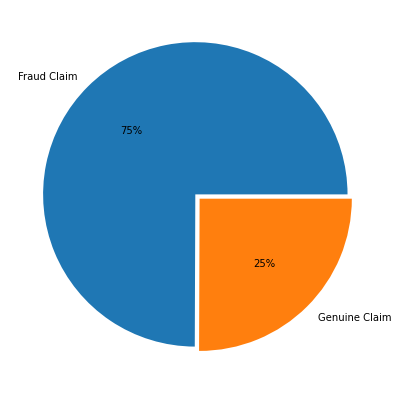

In [34]:
plt.figure(figsize=(10,7))
plt.pie(y.value_counts(),labels=['Fraud Claim','Genuine Claim'],explode=[0.02,0.02],autopct='%1.0f%%')
plt.show()

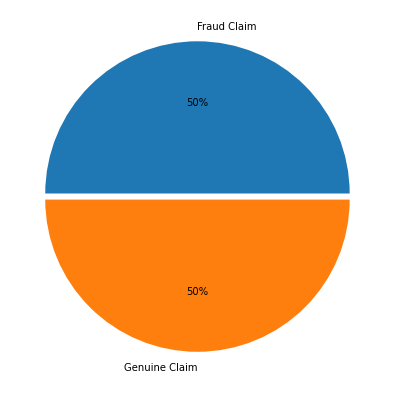

In [35]:
plt.figure(figsize=(10,7))
plt.pie(y_os.value_counts(),labels=['Fraud Claim','Genuine Claim'],explode=[0.02,0.02],autopct='%1.0f%%')
plt.show()

In [36]:
# splitting the data into training and testing
# training data = 80%
# testing data  = 20%
# splitting the data by using train-test-split method

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.20,random_state=123,stratify=y_os)

In [39]:
X_train.shape,y_train.shape

((1248577, 13), (1248577, 1))

In [40]:
X_test.shape,y_test.shape

((312145, 13), (312145, 1))

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1.Logistic Regression

In [43]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [55]:
# for training

In [45]:
y_predict_train = logistic_model.predict(X_train)

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve

In [48]:
print('Accuracy score:',accuracy_score(y_train,y_predict_train))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_train,y_predict_train))
print('....................................................')
print('Classification Report:\n',classification_report(y_train,y_predict_train))

Accuracy score: 0.5000708806905781
....................................................
Confusion matrix:
 [[565945  58343]
 [565857  58432]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.91      0.64    624288
           1       0.50      0.09      0.16    624289

    accuracy                           0.50   1248577
   macro avg       0.50      0.50      0.40   1248577
weighted avg       0.50      0.50      0.40   1248577



In [ ]:
# For testing

In [50]:
y_predict_test = logistic_model.predict(X_test)

In [51]:
print('Accuracy score:',accuracy_score(y_test,y_predict_test))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_test,y_predict_test))
print('....................................................')
print('Classification Report:\n',classification_report(y_test,y_predict_test))

Accuracy score: 0.49991510355764146
....................................................
Confusion matrix:
 [[141408  14665]
 [141434  14638]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.91      0.64    156073
           1       0.50      0.09      0.16    156072

    accuracy                           0.50    312145
   macro avg       0.50      0.50      0.40    312145
weighted avg       0.50      0.50      0.40    312145



In [53]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, logistic_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_predict_train)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.5000712062400072


Text(0, 0.5, 'True Positive Rate')

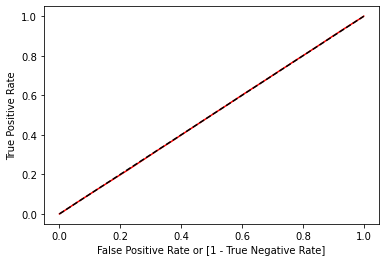

In [54]:
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# 2. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_classifier = RandomForestClassifier(n_estimators=50,random_state=123)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=123)

In [ ]:
#for training

In [60]:
y_pred_train = rf_classifier.predict(X_train)

In [61]:
print('Accuracy score:',accuracy_score(y_train,y_pred_train))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train))
print('....................................................')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy score: 0.9910778430164899
....................................................
Confusion matrix:
 [[620888   3400]
 [  7740 616549]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    624288
           1       0.99      0.99      0.99    624289

    accuracy                           0.99   1248577
   macro avg       0.99      0.99      0.99   1248577
weighted avg       0.99      0.99      0.99   1248577



In [ ]:
# for testing

In [63]:
y_pred_test = rf_classifier.predict(X_test)

In [64]:
print('Accuracy score:',accuracy_score(y_test,y_pred_test))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_test))
print('....................................................')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy score: 0.877012285956847
....................................................
Confusion matrix:
 [[142652  13421]
 [ 24969 131103]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88    156073
           1       0.91      0.84      0.87    156072

    accuracy                           0.88    312145
   macro avg       0.88      0.88      0.88    312145
weighted avg       0.88      0.88      0.88    312145



In [65]:
fpr, tpr, thresholds = roc_curve(y, rf_classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.991077845800419


Text(0, 0.5, 'True Positive Rate')

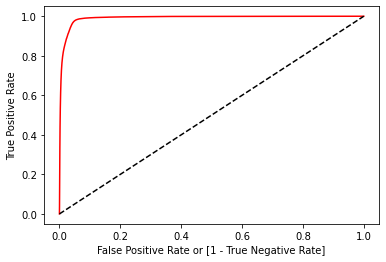

In [66]:
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# 3. Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gb_classifier = GradientBoostingClassifier(n_estimators=50)

In [70]:
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [72]:
y_predic_train = gb_classifier.predict(X_train)

In [73]:
print('Accuracy score:',accuracy_score(y_train,y_predic_train))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_train,y_predic_train))
print('....................................................')
print('Classification Report:\n',classification_report(y_train,y_predic_train))

Accuracy score: 0.5085613462365557
....................................................
Confusion matrix:
 [[291910 332378]
 [281221 343068]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.49    624288
           1       0.51      0.55      0.53    624289

    accuracy                           0.51   1248577
   macro avg       0.51      0.51      0.51   1248577
weighted avg       0.51      0.51      0.51   1248577



In [74]:
# for testing

In [76]:
y_predic_test = gb_classifier.predict(X_test)

In [77]:
print('Accuracy score:',accuracy_score(y_test,y_predic_test))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_test,y_predic_test))
print('....................................................')
print('Classification Report:\n',classification_report(y_test,y_predic_test))

Accuracy score: 0.5052267375738839
....................................................
Confusion matrix:
 [[72594 83479]
 [70962 85110]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.47      0.48    156073
           1       0.50      0.55      0.52    156072

    accuracy                           0.51    312145
   macro avg       0.51      0.51      0.50    312145
weighted avg       0.51      0.51      0.50    312145



In [79]:
fpr, tpr, thresholds = roc_curve(y, gb_classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_predic_train)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.5085613134210895


#  4.Extreme Gradient Boosting

In [ ]:
# to control the overfitting problem

In [80]:
!pip install xgboost

In [82]:
import xgboost as xgb
from datetime import datetime

In [84]:
train_x_y = xgb.DMatrix(data = X_train , label = y_train)

In [132]:
parameters = { 'max_depth':10,
              'objective':'binary:logistic',
              'eval_metric':'auc',
              'learning_rate':.05,}

In [133]:
start_time = datetime.now()
xgb_classifier = xgb.train(dtrain = train_x_y,params = parameters)
end_time = datetime.now()

In [134]:
execution_time = end_time - start_time
print(execution_time)

0:00:15.517515


In [100]:
# Training data

In [135]:
x_train_Dmatrix =xgb.DMatrix(X_train)


In [136]:
y_pred_train = xgb_classifier.predict(x_train_Dmatrix)

In [137]:
y_pred_train.shape

(1248577,)

In [138]:
for i in range(0,y_pred_train.shape[0]):
    if y_pred_train[i]>=0.5:
        y_pred_train[i] = 1
    else:
        y_pred_train[i] = 0

In [139]:
y_pred_train

array([1., 1., 1., ..., 1., 0., 0.], dtype=float32)

In [140]:
print('Accuracy score:',accuracy_score(y_train,y_pred_train))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_train,y_pred_train))
print('....................................................')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy score: 0.5236617365208553
....................................................
Confusion matrix:
 [[283325 340963]
 [253782 370507]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.45      0.49    624288
           1       0.52      0.59      0.55    624289

    accuracy                           0.52   1248577
   macro avg       0.52      0.52      0.52   1248577
weighted avg       0.52      0.52      0.52   1248577



In [101]:
# Testing data

In [141]:
x_test_Dmatrix = xgb.DMatrix(X_test)

In [142]:
y_test_predict = xgb_classifier.predict(x_test_Dmatrix)

In [143]:
y_test_predict.shape

(312145,)

In [144]:
for i in range(0,y_test_predict.shape[0]):
    if y_test_predict[i]>=0.5:
        y_test_predict[i] = 1
    else:
        y_test_predict[i] = 0

In [145]:
y_test_predict

array([1., 1., 1., ..., 1., 0., 1.], dtype=float32)

In [146]:
print('Accuracy score:',accuracy_score(y_test,y_test_predict))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_test,y_test_predict))
print('....................................................')
print('Classification Report:\n',classification_report(y_test,y_test_predict))

Accuracy score: 0.5136875490557273
....................................................
Confusion matrix:
 [[69428 86645]
 [65155 90917]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.44      0.48    156073
           1       0.51      0.58      0.55    156072

    accuracy                           0.51    312145
   macro avg       0.51      0.51      0.51    312145
weighted avg       0.51      0.51      0.51    312145



In [147]:
print('AUC Score       :',roc_auc_score(y_test,y_test_predict))

AUC Score       : 0.5136877696091603


# 5. KNN Classification

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [155]:
# Training 

In [156]:
X_train.shape

(1248577, 13)

In [153]:
y_pre_train = knn_classifier.predict(X_train)

In [154]:
print('Accuracy score:',accuracy_score(y_train,y_pre_train))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_train,y_pre_train))
print('....................................................')
print('Classification Report:\n',classification_report(y_train,y_pre_train))

Accuracy score: 0.8511137078450107
....................................................
Confusion matrix:
 [[589703  34585]
 [151311 472978]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86    624288
           1       0.93      0.76      0.84    624289

    accuracy                           0.85   1248577
   macro avg       0.86      0.85      0.85   1248577
weighted avg       0.86      0.85      0.85   1248577



In [160]:
# testing

In [158]:
y_pre_test = knn_classifier.predict(X_test)

In [159]:
print('Accuracy score:',accuracy_score(y_test,y_pre_test))
print('....................................................')
print('Confusion matrix:\n',confusion_matrix(y_test,y_pre_test))
print('....................................................')
print('Classification Report:\n',classification_report(y_test,y_pre_test))

Accuracy score: 0.6920629835493121
....................................................
Confusion matrix:
 [[125908  30165]
 [ 65956  90116]]
....................................................
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.81      0.72    156073
           1       0.75      0.58      0.65    156072

    accuracy                           0.69    312145
   macro avg       0.70      0.69      0.69    312145
weighted avg       0.70      0.69      0.69    312145



In [165]:
fpr, tpr, thresholds = roc_curve(y, knn_classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_test,y_pre_test)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.6920626162122029


Text(0, 0.5, 'True Positive Rate')

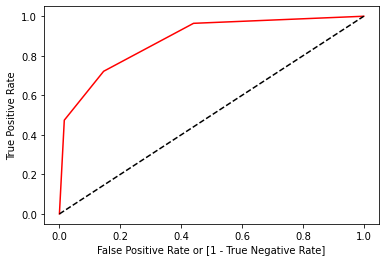

In [166]:
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# 6.SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_classifier = SVC( kernel='rbf')
svc_classifier.fit(X_train,y_train)